In [2]:
# import libraries
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from src import drop_column_using_vif_, show_vif_values

import imageio
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
#Read the data
Dataframeraw = pd.read_csv(os.path.join("data","Cleaned_data.csv"))

In [4]:
# Create a yeas' list
years = ['2018', '2019', '2020', '2021', '2022']

# store many DataFrames by dict
dataframes = {}

for year in years:
    # select all the columns including relating year，and also with the CSScode
    columns_for_year = [col for col in Dataframeraw.columns if year in col] + ['CSScode']
    # delect possible repeating columns by list-set-list
    columns_for_year = list(set(columns_for_year))
    """
    # set the CSScode as the index of dataframe
    dataframe_year = Dataframe[columns_for_year]
    dataframe_year.set_index('CSScode', inplace=True)
    """
    # create and save the DataFrame back to dicts
    dataframes[f'Dataframe_{year}'] = Dataframeraw[columns_for_year]

In [5]:
Dataframe_2018 = dataframes['Dataframe_2018']
Dataframe_2019 = dataframes['Dataframe_2019']
Dataframe_2020 = dataframes['Dataframe_2020']
Dataframe_2021 = dataframes['Dataframe_2021']
Dataframe_2022 = dataframes['Dataframe_2022']

In [6]:
# drop na 
# na row represents the total value of London
Dataframe_2018 = Dataframe_2018[Dataframe_2018['CSScode'] != 'E12000007']
Dataframe_2019 = Dataframe_2019[Dataframe_2019['CSScode'] != 'E12000007']
Dataframe_2020 = Dataframe_2020[Dataframe_2020['CSScode'] != 'E12000007']
Dataframe_2021 = Dataframe_2021[Dataframe_2021['CSScode'] != 'E12000007']
Dataframe_2022 = Dataframe_2022[Dataframe_2022['CSScode'] != 'E12000007']

**Standarlization**

In [7]:
# Define the scalar normalization function

scaler = StandardScaler()

# store many DataFrames_normed by dict
dataframes_normed = {}

for year in years:
    dataframes_normed[f'Dataframe_{year}_normed'] = dataframes[f'Dataframe_{year}']

    columns_to_normalize = [f'Finance_Secure_{year}', f'Environment_{year}', f'Employment_{year}', 
                            f'Healthy_{year}', f'Safety_{year}', f'Decent_Home_{year}', f'Connections_{year}',f'PriceDiff_{year}']

    # create and save the DataFrame back to dicts
    dataframes_normed[f'Dataframe_{year}_normed'].loc[:,columns_to_normalize] = scaler.fit_transform(dataframes[f'Dataframe_{year}'][columns_to_normalize])
    

In [8]:
dataframes_normed['Dataframe_2018_normed'].drop(32, axis=0, inplace=True)
dataframes_normed['Dataframe_2019_normed'].drop(32, axis=0, inplace=True)
dataframes_normed['Dataframe_2020_normed'].drop(32, axis=0, inplace=True)
dataframes_normed['Dataframe_2021_normed'].drop(32, axis=0, inplace=True)
dataframes_normed['Dataframe_2022_normed'].drop(32, axis=0, inplace=True)

C:\Users\SBH\AppData\Local\Temp\ipykernel_33048\3447670644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes_normed['Dataframe_2018_normed'].drop(32, axis=0, inplace=True)
C:\Users\SBH\AppData\Local\Temp\ipykernel_33048\3447670644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes_normed['Dataframe_2019_normed'].drop(32, axis=0, inplace=True)
C:\Users\SBH\AppData\Local\Temp\ipykernel_33048\3447670644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [9]:
Dataframe_2018_normed = dataframes_normed['Dataframe_2018_normed']
Dataframe_2019_normed = dataframes_normed['Dataframe_2019_normed']
Dataframe_2020_normed = dataframes_normed['Dataframe_2020_normed']
Dataframe_2021_normed = dataframes_normed['Dataframe_2021_normed']
Dataframe_2022_normed = dataframes_normed['Dataframe_2022_normed']

**data distribution**

In [10]:
Dataframe_2018_normed.columns

Index(['CSScode', 'Decent_Home_2018', 'Environment_2018', 'Safety_2018',
       'PriceDiff_2018', 'Healthy_2018', 'Employment_2018',
       'Finance_Secure_2018', 'Connections_2018'],
      dtype='object')

In [11]:
Dataframe_2018_normed_cormatrix = Dataframe_2018_normed[['Connections_2018', 'Decent_Home_2018', 'Safety_2018',
       'Environment_2018', 'Employment_2018', 'Finance_Secure_2018','Healthy_2018']]

Year: 2018
Descriptive Statistics


,Finance_Secure_2018,Environment_2018,Employment_2018,Healthy_2018,Safety_2018,Decent_Home_2018,Connections_2018,PriceDiff_2018
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,3.906597e-15,6.938894e-17,-3.469447e-16,1.283695e-15,-1.770806e-14,-1.040834e-16,4.163336e-17,0.002865
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.031618
min,-1.994027e+00,-1.412686e+00,-2.047847e+00,-1.607469e+00,-3.301918e+00,-2.302293e+00,-1.987888e+00,-2.059226
25%,-6.128478e-01,-7.922516e-01,-6.579564e-01,-7.410064e-01,-3.971380e-01,-5.956896e-01,-6.908264e-01,-0.421507
50%,-1.039923e-01,-2.049198e-02,1.580440e-01,-4.512828e-03,-3.404040e-02,2.226819e-01,3.806594e-01,-0.216153
75%,6.633295e-01,5.721992e-01,6.960663e-01,5.875703e-01,6.921547e-01,5.919470e-01,9.445994e-01,0.544982
max,1.818351e+00,2.430980e+00,1.825913e+00,2.580435e+00,1.418350e+00,1.899345e+00,1.395751e+00,2.064189


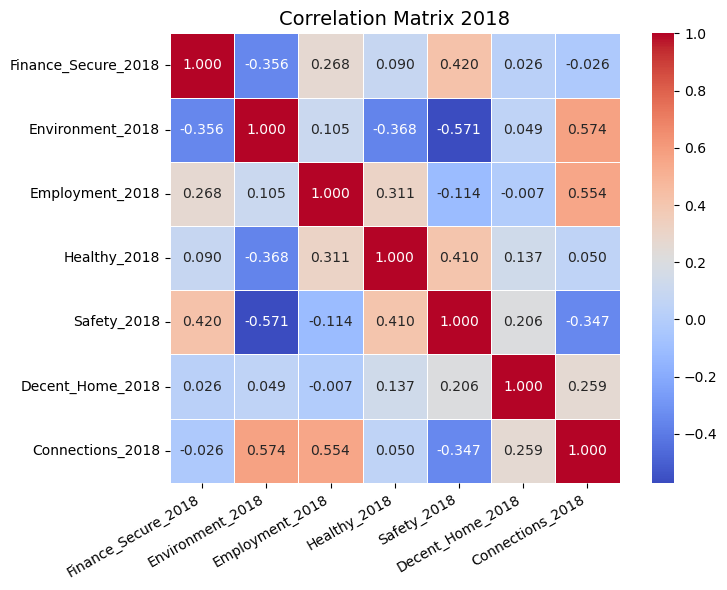

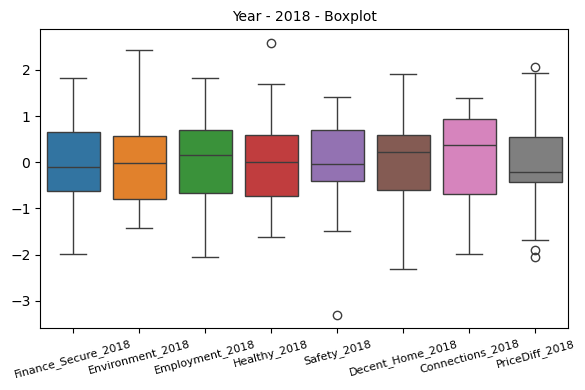

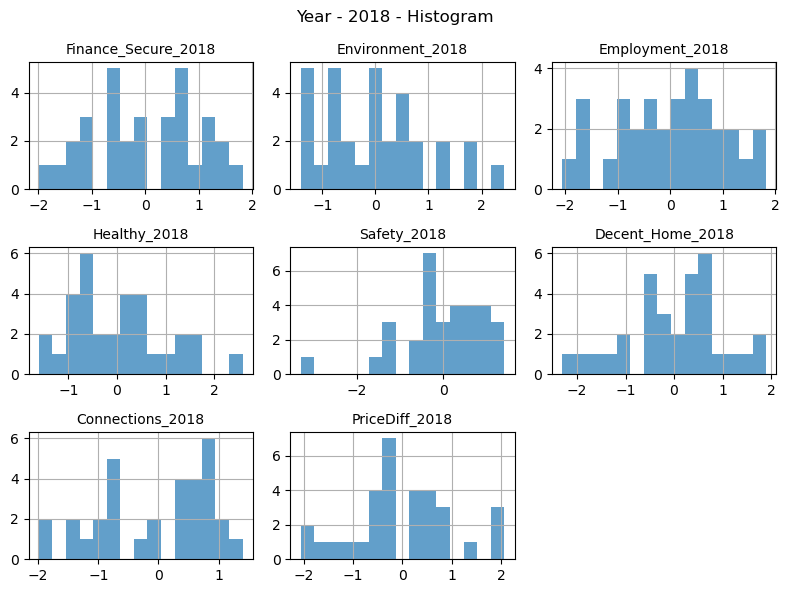

Year: 2019
Descriptive Statistics


,Finance_Secure_2019,Environment_2019,Employment_2019,Healthy_2019,Safety_2019,Decent_Home_2019,Connections_2019,PriceDiff_2019
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,2.067790e-15,2.151057e-16,-2.130240e-15,1.637579e-15,4.258399e-14,1.484923e-15,3.122502e-17,-0.001326
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.031725
min,-1.962225e+00,-1.449983e+00,-1.884051e+00,-1.502220e+00,-3.732283e+00,-2.094937e+00,-2.035919e+00,-3.420771
25%,-7.931581e-01,-8.257376e-01,-7.341776e-01,-8.224981e-01,-5.068532e-01,-6.861676e-01,-5.773503e-01,-0.324480
50%,1.605544e-01,-1.349063e-01,-4.234493e-02,-2.128509e-01,-4.607757e-02,8.136855e-02,2.734817e-01,0.008736
75%,5.758809e-01,5.476017e-01,8.451094e-01,8.522797e-01,6.911635e-01,6.222063e-01,8.812188e-01,0.414960
max,2.006450e+00,2.977996e+00,1.627596e+00,1.917410e+00,1.428405e+00,1.907910e+00,1.610503e+00,1.749698


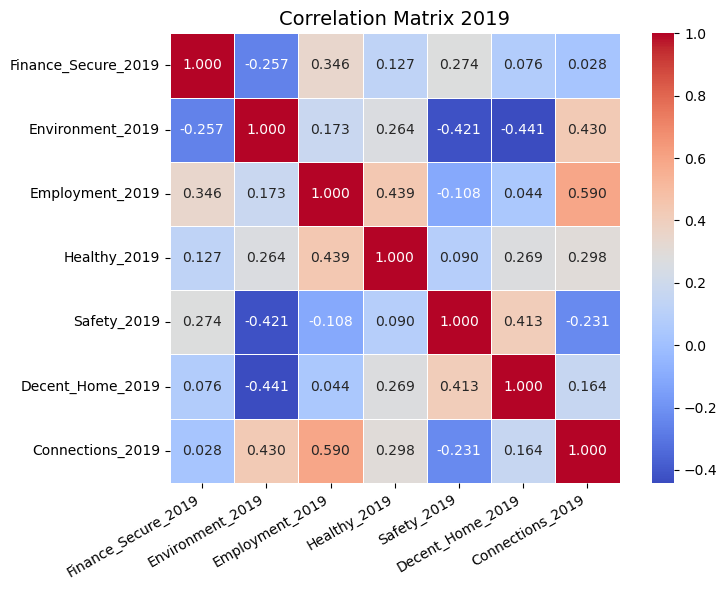

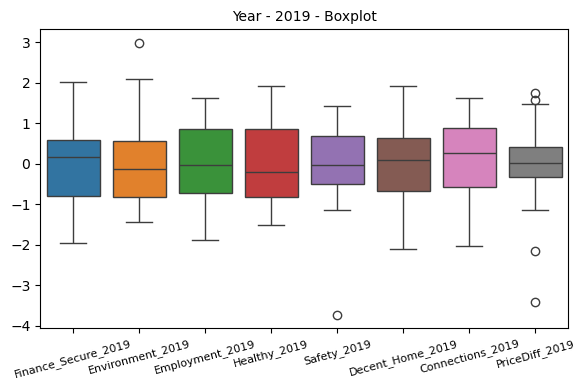

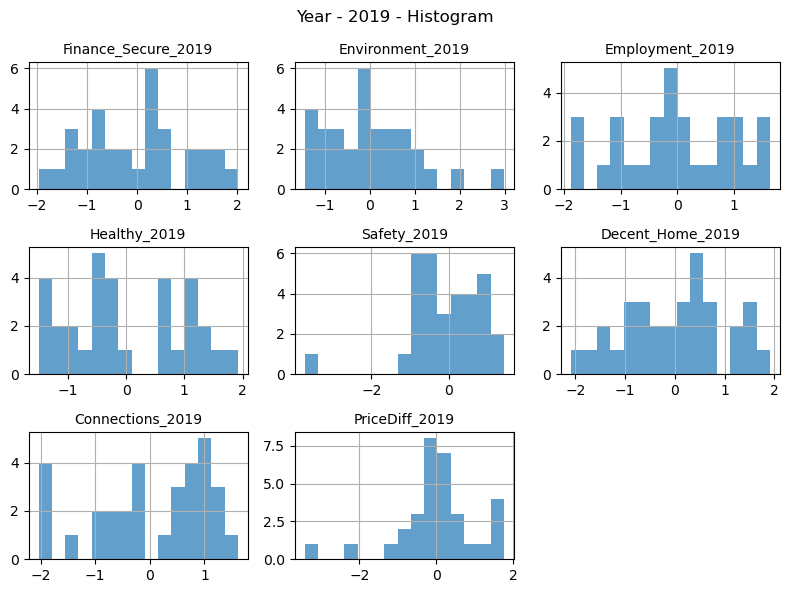

Year: 2020
Descriptive Statistics


,Finance_Secure_2020,Environment_2020,Employment_2020,Healthy_2020,Safety_2020,Decent_Home_2020,Connections_2020,PriceDiff_2020
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,-1.564721e-15,6.730727e-16,2.164935e-15,8.257284e-16,-1.719458e-14,-4.371503e-16,6.938894e-18,-0.005017
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.031338
min,-2.620558e+00,-1.299109e+00,-2.304341e+00,-2.805120e+00,-4.019249e+00,-2.577436e+00,-3.613707e+00,-2.286897
25%,-7.687075e-01,-6.290609e-01,-5.708582e-01,-3.269371e-01,-4.955238e-01,-5.004193e-01,-5.759148e-01,-0.765376
50%,9.717474e-02,-1.643043e-01,-1.957771e-01,1.961622e-02,2.092212e-01,3.179786e-01,2.341631e-01,-0.069305
75%,6.976040e-01,4.373132e-01,8.534362e-01,7.323391e-01,5.615936e-01,5.041124e-01,6.898320e-01,0.756145
max,1.475002e+00,3.262919e+00,1.892512e+00,1.458139e+00,1.618711e+00,1.866139e+00,1.044241e+00,1.908780


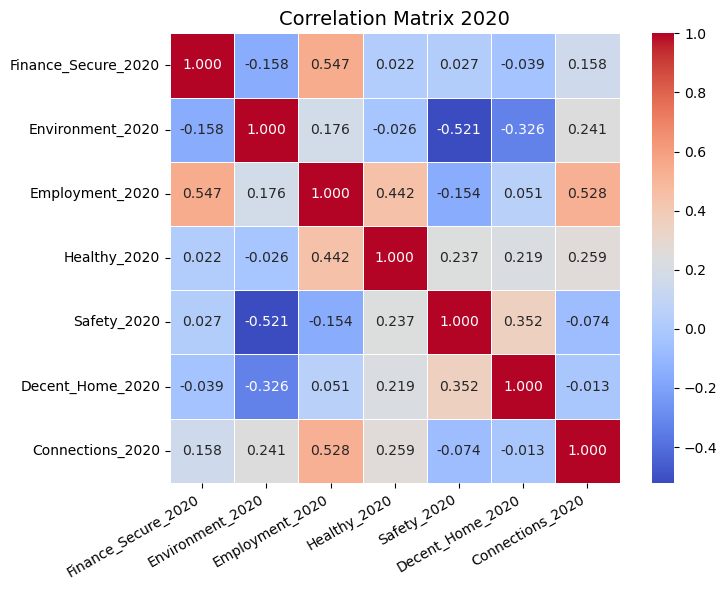

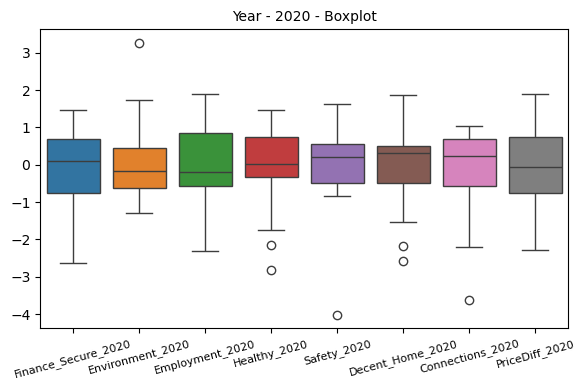

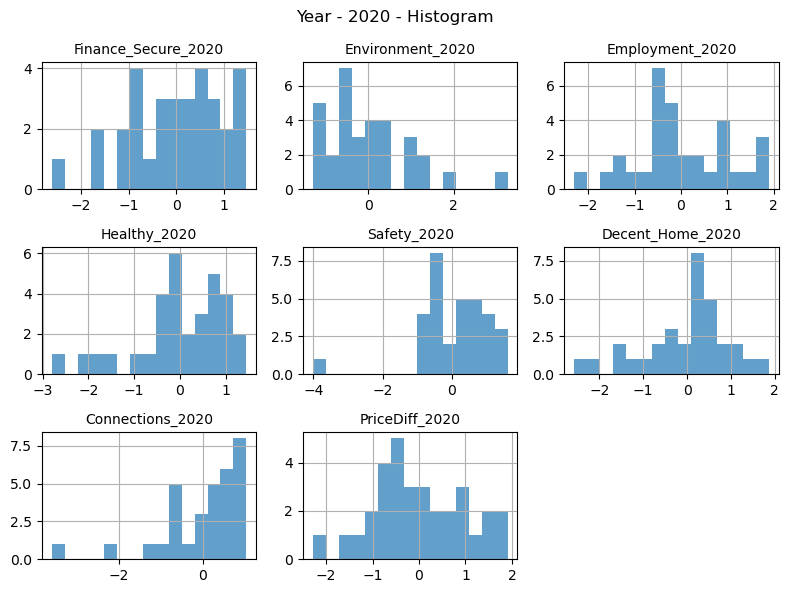

Year: 2021
Descriptive Statistics


,Finance_Secure_2021,Environment_2021,Employment_2021,Healthy_2021,Safety_2021,Decent_Home_2021,Connections_2021,PriceDiff_2021
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000
mean,9.714451e-17,-2.636780e-16,9.020562e-17,1.401657e-15,-4.662937e-15,-5.481726e-16,0.000000,0.000218
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.031753
min,-2.541024e+00,-1.428693e+00,-1.855792e+00,-2.391730e+00,-2.997584e+00,-2.206536e+00,-2.810369,-2.382698
25%,-6.464301e-01,-7.209733e-01,-9.187230e-01,-5.963954e-01,-5.077875e-01,-3.082522e-01,-0.766464,-0.624667
50%,2.661771e-01,-1.669901e-01,6.350620e-02,1.414133e-01,-3.767456e-01,2.094615e-01,0.051098,0.173563
75%,6.877909e-01,5.142236e-01,8.086456e-01,7.869960e-01,8.026318e-01,6.221318e-01,0.562074,0.731843
max,1.429618e+00,3.236428e+00,1.621525e+00,1.494063e+00,1.719925e+00,1.795116e+00,1.277440,1.522510


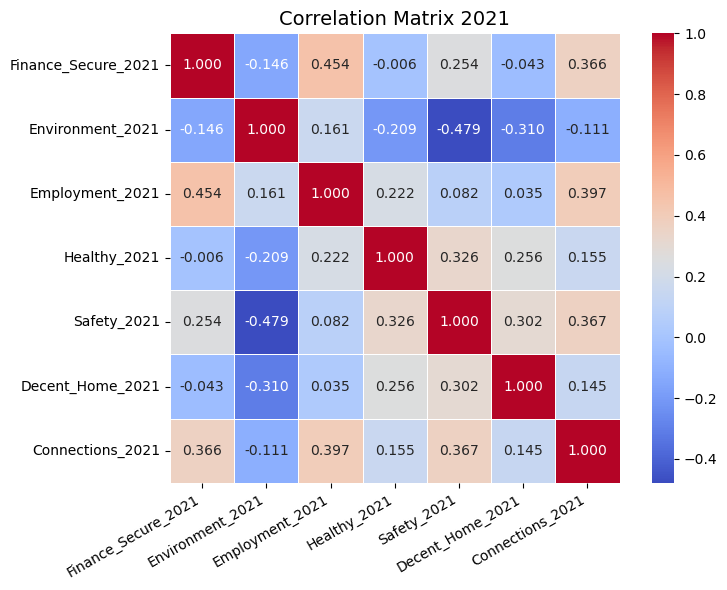

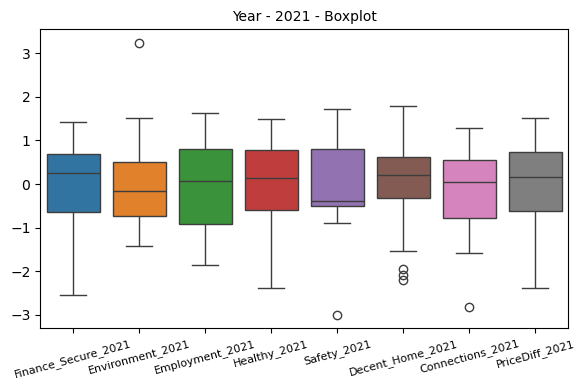

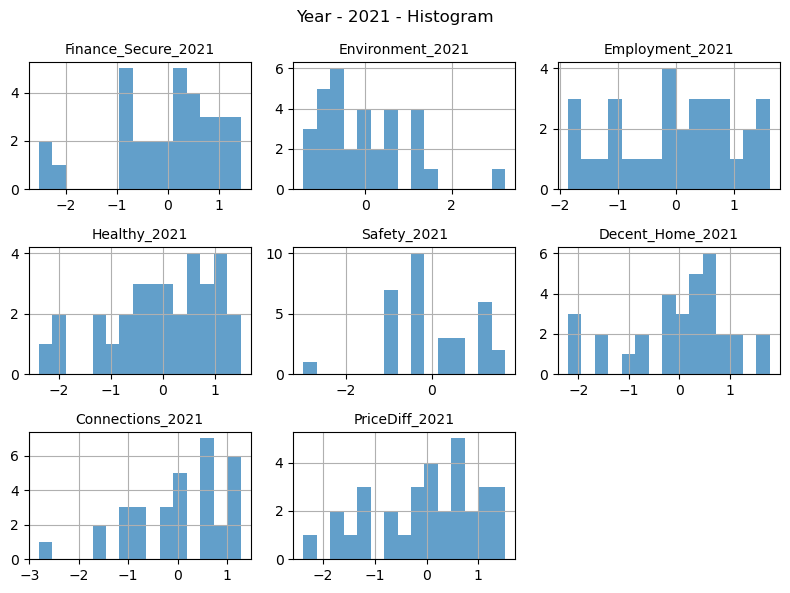

Year: 2022
Descriptive Statistics


,Finance_Secure_2022,Environment_2022,Employment_2022,Healthy_2022,Safety_2022,Decent_Home_2022,Connections_2022,PriceDiff_2022
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,-2.525757e-15,3.747003e-16,-6.938894e-18,8.326673e-16,3.025358e-15,1.151856e-15,-6.938894e-18,-0.002718
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.031632
min,-2.725097e+00,-1.564810e+00,-2.514763e+00,-1.528861e+00,-4.107958e+00,-2.428678e+00,-3.128634e+00,-2.285493
25%,-6.168670e-01,-7.665951e-01,-7.178307e-01,-9.423839e-01,-3.907312e-01,-5.626433e-01,-3.965874e-01,-0.831881
50%,1.697859e-01,-6.956271e-02,9.895696e-02,-1.856390e-01,-5.280152e-02,1.220517e-01,4.406526e-02,0.026958
75%,9.039953e-01,7.342730e-01,6.832743e-01,9.589377e-01,6.230579e-01,6.572711e-01,7.491095e-01,0.620066
max,1.449408e+00,3.201992e+00,1.632005e+00,1.498118e+00,1.636847e+00,1.544482e+00,1.806676e+00,2.362734


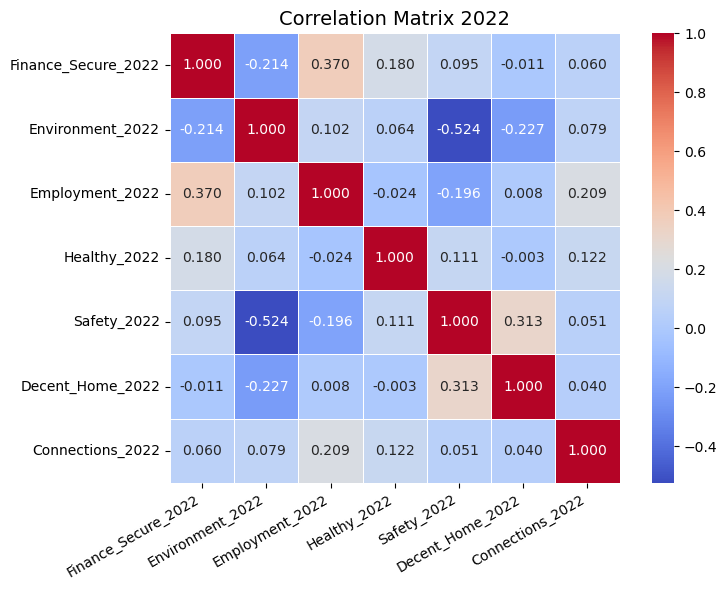

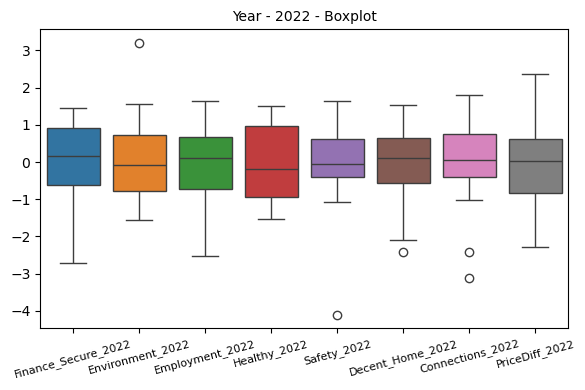

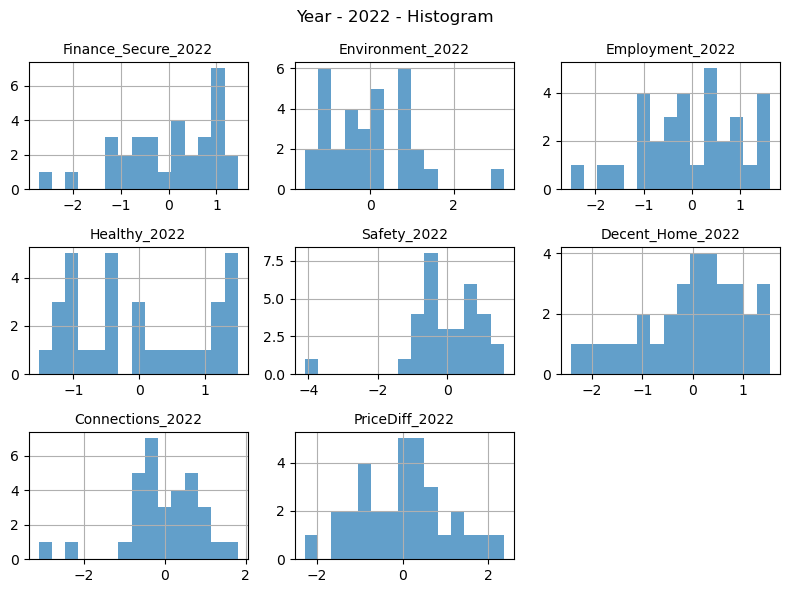

In [12]:
"""
# statistic every year in dataframes_normed
# make the directory for saving the output files and images

for year in years:
    print(f"Year: {year}")
    print("Descriptive Statistics")
    

    # 定义你要分析的列
    columns_to_analyze = [f'Finance_Secure_{year}', f'Environment_{year}', f'Employment_{year}', 
                      f'Healthy_{year}', f'Safety_{year}', f'Decent_Home_{year}', f'Connections_{year}', f'PriceDiff_{year}']
    
    #save the Descriptive Statistics to local csv file
    description = dataframes_normed[f'Dataframe_{year}_normed'][columns_to_analyze].describe()
    description.to_csv(os.path.join("AnalysisResult", f'Statistical_Description_{year}.csv'))

    display(dataframes_normed[f'Dataframe_{year}_normed'][columns_to_analyze].describe())  # show the descriptive statistics


    # plot the correlation matrix
    columns_for_correlation = [f'Finance_Secure_{year}', f'Environment_{year}', f'Employment_{year}', 
                      f'Healthy_{year}', f'Safety_{year}', f'Decent_Home_{year}', f'Connections_{year}']

    corr = dataframes_normed[f'Dataframe_{year}_normed'][columns_for_correlation].corr()

    # Set the size of the figure
    f = plt.figure(figsize=(8, 6))

    # Create the heatmap, while ensuring the aspect ratio is equal
    # so the heatmap cells are square
    ax = sns.heatmap(corr, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='coolwarm', annot_kws={"size": 10})

    # Set the title of the heatmap
    plt.title(f'Correlation Matrix {year}', fontsize=14)

    # Rotate the x and y axis labels for better readability
    plt.xticks(rotation=30, ha='right', fontsize=10)
    plt.yticks(ha='right', fontsize=10)

    plt.tight_layout()
    # save the fig
    plt.savefig(os.path.join("images", f'CorrelationMatrix_{year}.png'),bbox_inches='tight')
    # Show the plot
    plt.show()




    # plot the boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=dataframes_normed[f'Dataframe_{year}_normed'][columns_to_analyze])
    plt.title(f"Year - {year} - Boxplot", fontsize=10)
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()
    plt.savefig(os.path.join("images", f'Boxplot_{year}.png'), bbox_inches='tight')
    plt.show()

    # plot the histograms
    """
    dataframes_normed[f'Dataframe_{year}_normed'][columns_to_analyze].hist(figsize=(8,6), bins=10)
    plt.suptitle(f"Year - {year} - Histogram", fontsize=12)
    plt.show()
    """

    # 绘制直方图
    axes = dataframes_normed[f'Dataframe_{year}_normed'][columns_to_analyze].hist(figsize=(8, 6), bins=15, alpha=0.7, rwidth=1)

    # 设置每个子图的标题大小
    for ax in axes.flatten():
        ax.set_title(ax.get_title(), fontsize=10)

    plt.suptitle(f"Year - {year} - Histogram", fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join("images", f'Histogram_{year}.png'), bbox_inches='tight')
    plt.show()
    
"""

**VIF and Multi-linearity**

*define the dependant variables, independant variables and constant*

In [13]:
"""
X_vars = [f'Finance_Secure_{year}', f'Environment_{year}', f'Employment_{year}', 
            f'Healthy_{year}', f'Safety_{year}', f'Decent_Home_{year}', f'Connections_{year}']
Y_var = [f'PriceDiff_{year}']
"""

"\nX_vars = [f'Finance_Secure_{year}', f'Environment_{year}', f'Employment_{year}', \n            f'Healthy_{year}', f'Safety_{year}', f'Decent_Home_{year}', f'Connections_{year}']\nY_var = [f'PriceDiff_{year}']\n"

*calculate the VIFs*

In [14]:
"""
vif_data = pd.DataFrame()
for year in years:
    # set the columns for calculating VIFs
    X_vars = [f'Finance_Secure_{year}', f'Environment_{year}', f'Employment_{year}', 
            f'Healthy_{year}', f'Safety_{year}', f'Decent_Home_{year}', f'Connections_{year}']
    
    # add the constatnt for calculating VIF
    X = sm.add_constant(dataframes_normed[f'Dataframe_{year}_normed'][X_vars])

 
    vif_data[f'feature_{year}'] = X.columns
    vif_data[f'VIF_{year}'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)
vif_data.to_csv(os.path.join("AnalysisResult","VIF_results_18_22.csv"))
"""

          feature_2018  VIF_2018         feature_2019  VIF_2019  \
0                const  1.000000                const  1.000000   
1  Finance_Secure_2018  1.628835  Finance_Secure_2019  1.410548   
2     Environment_2018  2.496728     Environment_2019  2.668788   
3      Employment_2018  2.059287      Employment_2019  2.289789   
4         Healthy_2018  1.735321         Healthy_2019  1.762400   
5          Safety_2018  2.152249          Safety_2019  1.501046   
6     Decent_Home_2018  1.277498     Decent_Home_2019  2.306162   
7     Connections_2018  2.828593     Connections_2019  2.568227   

          feature_2020  VIF_2020         feature_2021  VIF_2021  \
0                const  1.000000                const  1.000000   
1  Finance_Secure_2020  1.910051  Finance_Secure_2021  1.527413   
2     Environment_2020  1.647512     Environment_2021  1.508008   
3      Employment_2020  3.047508      Employment_2021  1.648603   
4         Healthy_2020  1.633568         Healthy_2021  1.2758

**Operate the Multiple Regression Model**

In [15]:
"""
for temp_year in years:


    Names_X_indep = [f'Finance_Secure_{temp_year}', f'Environment_{temp_year}', f'Employment_{temp_year}', 
            f'Healthy_{temp_year}', f'Safety_{temp_year}', f'Decent_Home_{temp_year}', f'Connections_{temp_year}']
    
    X_indep = dataframes_normed[f'Dataframe_{temp_year}_normed'][Names_X_indep]  # 自变量
    y_dep = dataframes_normed[f'Dataframe_{temp_year}_normed'][f'PriceDiff_{temp_year}']                # 因变量
    
    # 添加常数项
    X = sm.add_constant(X_indep)

    # 构建模型
    model = sm.OLS(y_dep, X).fit()

    # 查看模型结果
    print(model.summary())

    # 提取模型的系数和统计数据
    results_df = pd.DataFrame({'coefficients': model.params, 'p-values': model.pvalues})

    # 保存到CSV
    results_df.to_csv(os.path.join("AnalysisResult", "ModelResults", f'model_results_{temp_year}.csv'))
"""

                            OLS Regression Results                            
Dep. Variable:         PriceDiff_2018   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     3.623
Date:                Mon, 15 Jan 2024   Prob (F-statistic):            0.00835
Time:                        16:05:33   Log-Likelihood:                -34.357
No. Observations:                  32   AIC:                             84.71
Df Residuals:                      24   BIC:                             96.44
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0029    

**Merge the years' datasets between 2018-2022**

In [16]:
#sort the columns index for the raw data 

Sorted_Dataframe_2018_normed = Dataframe_2018_normed.sort_index(axis=1)
Sorted_Dataframe_2019_normed = Dataframe_2019_normed.sort_index(axis=1)
Sorted_Dataframe_2020_normed = Dataframe_2020_normed.sort_index(axis=1)
Sorted_Dataframe_2021_normed = Dataframe_2021_normed.sort_index(axis=1)
Sorted_Dataframe_2022_normed = Dataframe_2022_normed.sort_index(axis=1)
Sorted_Dataframe_2018_normed.to_csv(os.path.join("data","Regression2018_2022","2018.csv"))
Sorted_Dataframe_2019_normed.to_csv(os.path.join("data","Regression2018_2022","2019.csv"))
Sorted_Dataframe_2020_normed.to_csv(os.path.join("data","Regression2018_2022","2020.csv"))
Sorted_Dataframe_2021_normed.to_csv(os.path.join("data","Regression2018_2022","2021.csv"))
Sorted_Dataframe_2022_normed.to_csv(os.path.join("data","Regression2018_2022","2022.csv"))

In [17]:
Merged_dataframe_2018_2022 = pd.read_csv(os.path.join("data","Regression2018_2022","Merged2018_2022.csv"))

In [18]:
"""
merged_vif_data = pd.DataFrame()

# set the columns for calculating VIFs
X_vars = ['Finance_Secure', 'Environment', 'Employment', 
            'Healthy', 'Safety', 'Decent_Home', 'Connections']
    
# add the constatnt for calculating VIF
X_merge = sm.add_constant(Merged_dataframe_2018_2022[X_vars])

 
merged_vif_data[f'feature_{year}'] = X_merge.columns
merged_vif_data[f'VIF_{year}'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(merged_vif_data)
merged_vif_data.to_csv(os.path.join("AnalysisResult","Merged_VIF_results_18_22.csv"))
"""

     feature_2022  VIF_2022
0           const  1.000000
1  Finance_Secure  1.336619
2     Environment  1.526039
3      Employment  1.335429
4         Healthy  1.102637
5          Safety  1.576754
6     Decent_Home  1.132857
7     Connections  1.086470


In [20]:
"""
import statsmodels.api as sm

X_vars = ['Finance_Secure', 'Environment', 'Employment', 
            'Healthy', 'Safety', 'Decent_Home', 'Connections']
    
X_indep = Merged_dataframe_2018_2022[X_vars]    # 自变量
y_dep = Merged_dataframe_2018_2022['PriceDiff']       # 因变量
    
# 添加常数项
X_merge = sm.add_constant(X_indep)

# 构建模型
model = sm.OLS(y_dep, X_merge).fit()

# 查看模型结果
print(model.summary())

# 提取模型的系数和统计数据
results_df = pd.DataFrame({'coefficients': model.params, 'p-values': model.pvalues})

# 保存到CSV
results_df.to_csv(os.path.join("AnalysisResult", "ModelResults", "model_results_18_22.csv"))
"""

                            OLS Regression Results                            
Dep. Variable:              PriceDiff   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     3.552
Date:                Mon, 15 Jan 2024   Prob (F-statistic):            0.00145
Time:                        16:09:14   Log-Likelihood:                -217.35
No. Observations:                 160   AIC:                             450.7
Df Residuals:                     152   BIC:                             475.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0012      0.076     -0.